# ITS307 Data Analytics                                                   : Spring Semester 2022
# Lecture 13 - Exercise
# K Nearest Neighbours

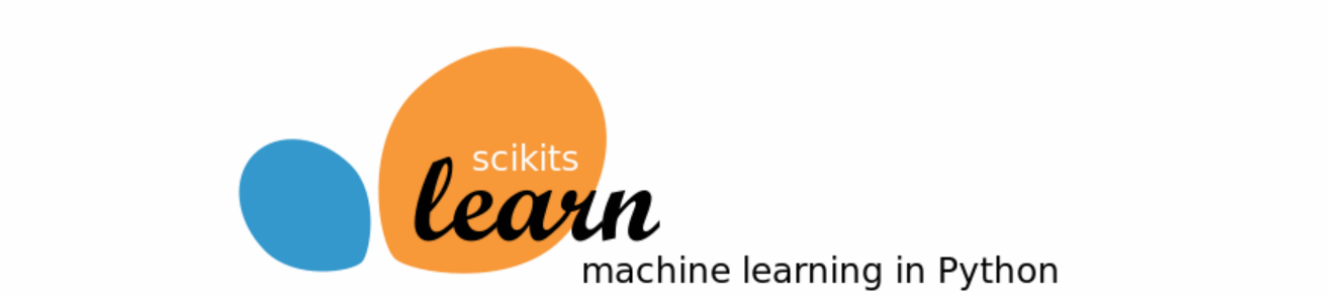

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Part A - KNN for Classification

# 1. Data Manipulation with pandas

In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['class'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

# 2. EDA

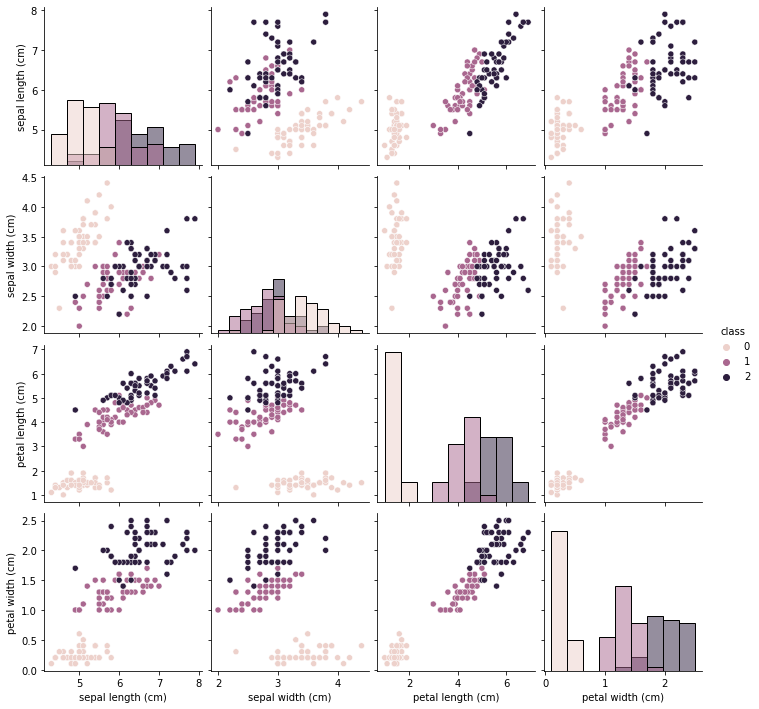

In [4]:
sns.pairplot(df,hue='class',diag_kind="hist")
plt.show()

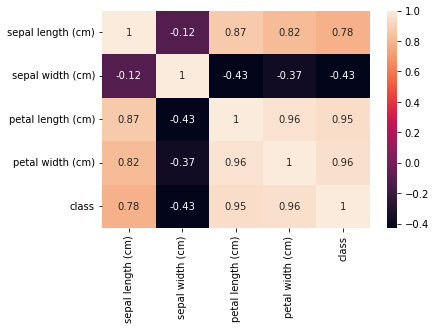

In [5]:
sns.heatmap(data= df.corr(),annot=True)
plt.show()

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

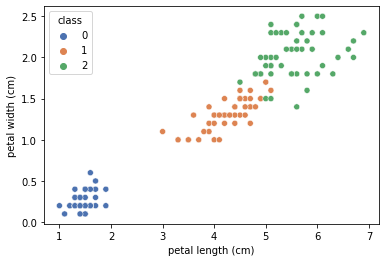

In [6]:
sns.scatterplot(data = df,x= 'petal length (cm)',y = 'petal width (cm)',hue='class',palette="deep")

# 3. Split data into traning and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,shuffle=True,stratify=iris.target,random_state=5)

# 4. Training Model

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [9]:
y_test

array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 1])

# 5. Model Evaluation

In [10]:
knn.score(x_train,y_train)

0.9666666666666667

In [11]:
knn.score(x_test,y_test)

0.9666666666666667

In [12]:
from sklearn.metrics import confusion_matrix
y_hat = knn.predict(x_test)
y_hat


array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 0, 2, 2, 1, 1])

In [13]:
knn.predict_proba(x_test), y_hat

(array([[1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [0. , 0. , 1. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ],
        [0. , 1. , 0. ],
        [0. , 0. , 1. ],
        [0. , 0. , 1. ],
        [0. , 0. , 1. ],
        [1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [0. , 1. , 0. ],
        [0. , 0.2, 0.8],
        [0. , 0.6, 0.4],
        [0. , 1. , 0. ],
        [1. , 0. , 0. ],
        [0. , 0. , 1. ],
        [0. , 0. , 1. ],
        [0. , 1. , 0. ],
        [0. , 1. , 0. ]]),
 array([0, 0, 0, 2, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 1,
        2, 1, 1, 0, 2, 2, 1, 1]))

In [14]:
matrix = confusion_matrix(y_test,y_hat)

In [15]:
matrix

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

Text(33.0, 0.5, 'Truth')

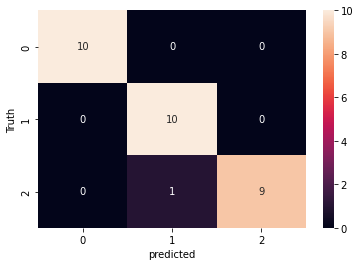

In [16]:
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# 6. Chosing best k

In [17]:
trainscore = []
testscore = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    trainscore.append(knn.score(x_train,y_train))
    testscore.append(knn.score(x_test,y_test))    

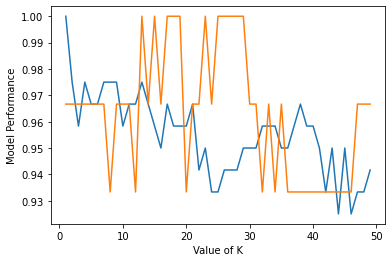

In [18]:
sns.lineplot(x = np.arange(1,50),y = trainscore)
sns.lineplot(x = np.arange(1,50),y = testscore)
plt.xlabel("Value of K")
plt.ylabel("Model Performance")
plt.show()

# Part B - KNN for Regression

In [82]:
boston = datasets.load_boston()


In [85]:
from sklearn.linear_model import LinearRegression
xtrain,xtest,ytrain,ytest = train_test_split(boston.data,boston.target,test_size=0.2,random_state=5)

xtest.shape

(102, 13)

In [86]:
xtrain.shape

(404, 13)

In [89]:
linearmodel = LinearRegression() 
linearmodel.fit(xtrain,ytrain)
ypred = linearmodel.predict(xtest)

In [90]:
from sklearn.metrics import mean_squared_error

In [91]:
MSE = mean_squared_error(ytest,ypred)
MSE

20.86929218377072

In [94]:
knnr = KNeighborsRegressor(n_neighbors = 6)
knnr.fit(xtrain,ytrain)
ypred = knnr.predict(xtest)
MSE = mean_squared_error(ytest,ypred)
MSE

34.27619825708061

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
sc = StandardScaler()
x_train =  sc.fit_transform(xtrain)
x_test = sc.fit_transform(xtest)

In [97]:
lr = LinearRegression()
lr.fit(x_train,ytrain)
ypred = lr.predict(x_test)
MSE = mean_squared_error(ytest,ypred)
MSE

20.410582227148026

In [99]:
trMSE = []
teMSE = []

for k in range(1,50):
    knnr = KNeighborsRegressor(n_neighbors = k)
    knnr.fit(x_train,ytrain)
    ypred_tr = knnr.predict(x_train)
    ypred_te = knnr.predict(x_test)

    trMSE.append(mean_squared_error(ytrain,ypred_tr))
    teMSE.append(mean_squared_error(ytest,ypred_te))
    

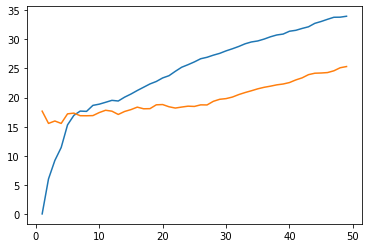

In [100]:
plt.plot(np.arange(1,50),trMSE)
plt.plot(np.arange(1,50),teMSE)
plt.show()